In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/denoising-dirty-documents/sampleSubmission.csv
/kaggle/input/denoising-dirty-documents/train/8.png
/kaggle/input/denoising-dirty-documents/train/191.png
/kaggle/input/denoising-dirty-documents/train/86.png
/kaggle/input/denoising-dirty-documents/train/17.png
/kaggle/input/denoising-dirty-documents/train/42.png
/kaggle/input/denoising-dirty-documents/train/179.png
/kaggle/input/denoising-dirty-documents/train/104.png
/kaggle/input/denoising-dirty-documents/train/111.png
/kaggle/input/denoising-dirty-documents/train/78.png
/kaggle/input/denoising-dirty-documents/train/5.png
/kaggle/input/denoising-dirty-documents/train/99.png
/kaggle/input/denoising-dirty-documents/train/3.png
/kaggle/input/denoising-dirty-documents/train/123.png
/kaggle/input/denoising-dirty-documents/train/105.png
/kaggle/input/denoising-dirty-documents/train/122.png
/kaggle/input/denoising-dirty-documents/train/92.png
/kaggle/input/denoising-dirty-documents/train/20.png
/kaggle/input/denoising-dirty-docu

In [50]:
import os
import glob
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout, UpSampling2D

In [51]:
training_images = glob.glob('/kaggle/input/denoising-dirty-documents/train/*.png')
cleaned_images = glob.glob('/kaggle/input/denoising-dirty-documents/train_cleaned/*.png')
test_images = glob.glob('/kaggle/input/denoising-dirty-documents/test/*.png')

In [52]:
def load_image(path):
    image_list = np.zeros((len(path), 258, 540, 1))
    for i, fig in enumerate(path):
        img = image.load_img(fig, color_mode='grayscale', target_size=(258, 540))
        x = image.img_to_array(img).astype('float32')
        x = x / 255.0
        image_list[i] = x
    
    return image_list

x_train = load_image(training_images)
y_train = load_image(cleaned_images)
x_test = load_image(test_images)

print(x_train.shape, x_test.shape)


(144, 258, 540, 1) (72, 258, 540, 1)


In [53]:
def train_val_split(x_train, y_train):
    rnd = np.random.RandomState(seed=42)
    perm = rnd.permutation(len(x_train))
    train_idx = perm[:int(0.8 * len(x_train))]
    val_idx = perm[int(0.8 * len(x_train)):]
    return x_train[train_idx], y_train[train_idx], x_train[val_idx], y_train[val_idx]

x_train, y_train, x_val, y_val = train_val_split(x_train, y_train)
print(x_train.shape, x_val.shape)

(115, 258, 540, 1) (29, 258, 540, 1)


In [55]:
img_rows = 258
img_cols = 540
channels = 1
img_shape = (img_rows, img_cols, channels)

Train on 115 samples, validate on 29 samples
Epoch 1/200
115/115 [==============================] - 1s 8ms/step - loss: 0.2751 - val_loss: 0.2508
Epoch 2/200
115/115 [==============================] - 0s 4ms/step - loss: 0.2420 - val_loss: 0.2255
Epoch 3/200
115/115 [==============================] - 0s 4ms/step - loss: 0.2175 - val_loss: 0.2031
Epoch 4/200
115/115 [==============================] - 0s 4ms/step - loss: 0.1955 - val_loss: 0.1816
Epoch 5/200
115/115 [==============================] - 0s 4ms/step - loss: 0.1733 - val_loss: 0.1582
Epoch 6/200
115/115 [==============================] - 0s 4ms/step - loss: 0.1472 - val_loss: 0.1246
Epoch 7/200
115/115 [==============================] - 0s 4ms/step - loss: 0.1108 - val_loss: 0.0903
Epoch 8/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0816 - val_loss: 0.0730
Epoch 9/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0694 - val_loss: 0.0693
Epoch 10/200
115/115 [========================

Epoch 81/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0141 - val_loss: 0.0137
Epoch 82/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.0136
Epoch 83/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0138 - val_loss: 0.0134
Epoch 84/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0136 - val_loss: 0.0134
Epoch 85/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0135 - val_loss: 0.0131
Epoch 86/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.0130
Epoch 87/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0132 - val_loss: 0.0128
Epoch 88/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0131 - val_loss: 0.0127
Epoch 89/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.0125
Epoch 90/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0128

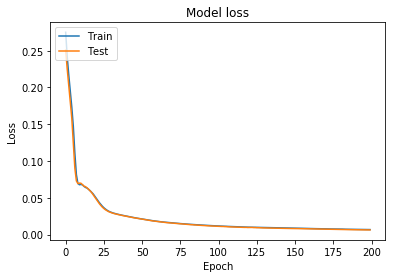

In [57]:
input_layer = Input(shape=img_shape)
        
# encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)

# decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)


output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
        
early_stopping = EarlyStopping(monitor='val_loss',
                                       min_delta=0,
                                       patience=20,
                                       verbose=1, 
                                       mode='auto')

autoencoder_model =Model(input_layer, output_layer)
autoencoder_model.compile(loss='mse', optimizer=Adam(lr=0.001))
history = autoencoder_model.fit(x_train, y_train,
                                             batch_size=32,
                                             epochs=200,
                                             validation_data=(x_val, y_val),
                                             callbacks=[early_stopping])
autoencoder_model.summary()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

preds = autoencoder_model.predict(x_test)

In [58]:
preds = autoencoder_model.predict(x_test)
print(preds)

[[[[0.911705  ]
   [0.95513487]
   [0.95977724]
   ...
   [0.9568325 ]
   [0.9183568 ]
   [0.79682624]]

  [[0.9447143 ]
   [0.99139833]
   [0.9880048 ]
   ...
   [0.991499  ]
   [0.9868814 ]
   [0.9139587 ]]

  [[0.9728807 ]
   [0.9952493 ]
   [0.97923934]
   ...
   [0.9663106 ]
   [0.98095644]
   [0.9181512 ]]

  ...

  [[0.95494723]
   [0.99144137]
   [0.96322066]
   ...
   [0.9781589 ]
   [0.9925524 ]
   [0.9126355 ]]

  [[0.9358369 ]
   [0.9879168 ]
   [0.9769675 ]
   ...
   [0.98333013]
   [0.9761733 ]
   [0.8294127 ]]

  [[0.91014814]
   [0.9362627 ]
   [0.8975823 ]
   ...
   [0.7087905 ]
   [0.5452348 ]
   [0.5508283 ]]]


 [[[0.911705  ]
   [0.95513487]
   [0.95977724]
   ...
   [0.95714605]
   [0.91884494]
   [0.7971417 ]]

  [[0.9447143 ]
   [0.99139833]
   [0.9880048 ]
   ...
   [0.99143386]
   [0.98760426]
   [0.9033258 ]]

  [[0.9728807 ]
   [0.9952493 ]
   [0.97923934]
   ...
   [0.96656823]
   [0.9830427 ]
   [0.90269625]]

  ...

  [[0.95494723]
   [0.99144137]
   [0.9

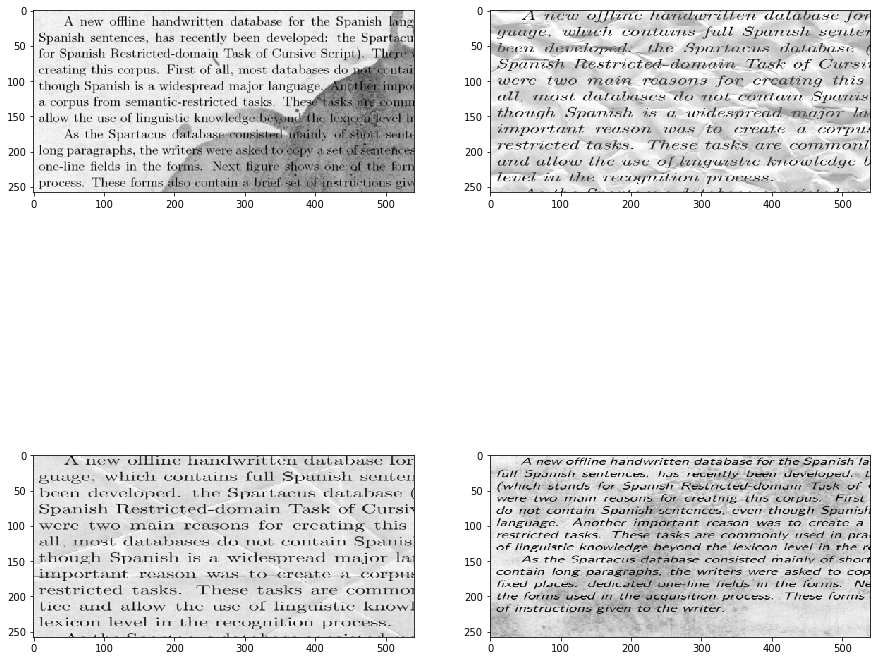

In [59]:
x_test_0 = x_test[13] * 255.0
x_test_0 = x_test_0.reshape(258, 540)
x_test_1 = x_test[55] * 255.0
x_test_1 = x_test_1.reshape(258, 540)
x_test_2 = x_test[34] * 255.0
x_test_2 = x_test_2.reshape(258, 540)
x_test_3 = x_test[40] * 255.0
x_test_3 = x_test_3.reshape(258, 540)
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(2,2,1)
plt.imshow(x_test_0,cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(x_test_1,cmap='gray')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(x_test_2,cmap='gray')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(x_test_3,cmap='gray')

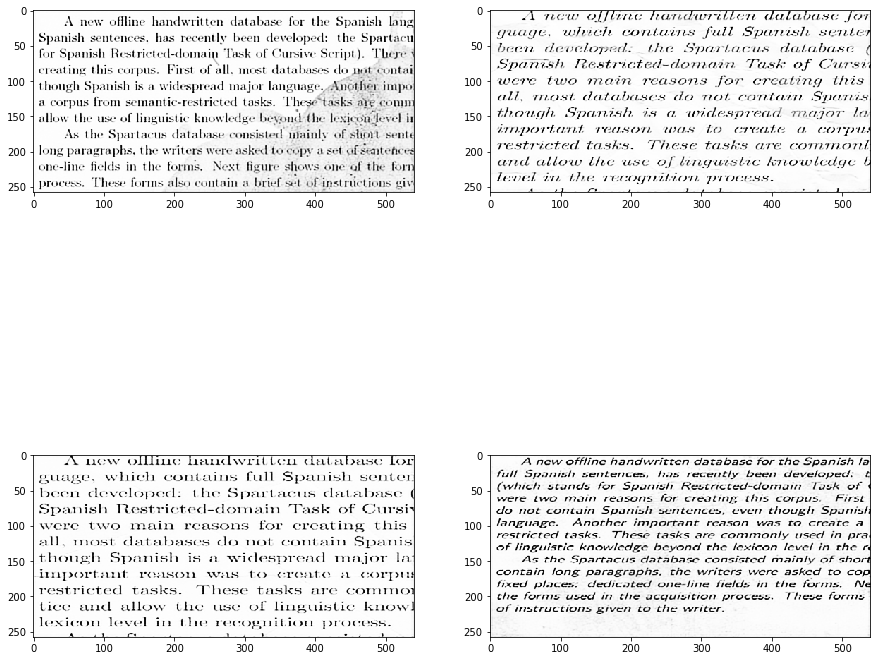

In [60]:
preds_0 = preds[13] * 255.0
preds_0 = preds_0.reshape(258, 540)
preds_1 = preds[55] * 255.0
preds_1 = preds_1.reshape(258, 540)
preds_2 = preds[34] * 255.0
preds_2 = preds_2.reshape(258, 540)
preds_3 = preds[40] * 255.0
preds_3 = preds_3.reshape(258, 540)
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(2,2,1)
plt.imshow(preds_0,cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(preds_1,cmap='gray')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(preds_2,cmap='gray')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(preds_3,cmap='gray')